# ***Chargement et analyse des données***


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Chargement du dataset
data = pd.read_csv("df_file.csv")

# Aperçu des données
print("Aperçu des données :")
print(data.head())



Aperçu des données :
                                                Text  Label
0  Budget to set scene for election\n \n Gordon B...      0
1  Army chiefs in regiments decision\n \n Militar...      0
2  Howard denies split over ID cards\n \n Michael...      0
3  Observers to monitor UK election\n \n Minister...      0
4  Kilroy names election seat target\n \n Ex-chat...      0


In [3]:
# Informations générales sur le dataset
print("\nRésumé du dataset :")
print(data.info())



Résumé du dataset :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    2225 non-null   object
 1   Label   2225 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 34.9+ KB
None


In [4]:
# Vérification des valeurs manquantes
print("\nValeurs manquantes :")
print(data.isnull().sum())



Valeurs manquantes :
Text     0
Label    0
dtype: int64


In [5]:
# Distribution des catégories
print("\nDistribution des catégories :")
print(data['Label'].value_counts())


Distribution des catégories :
Label
1    511
4    510
0    417
2    401
3    386
Name: count, dtype: int64


C:\Users\manad\AppData\Local\Temp\ipykernel_19296\2106416682.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Label', data=data, palette='viridis')


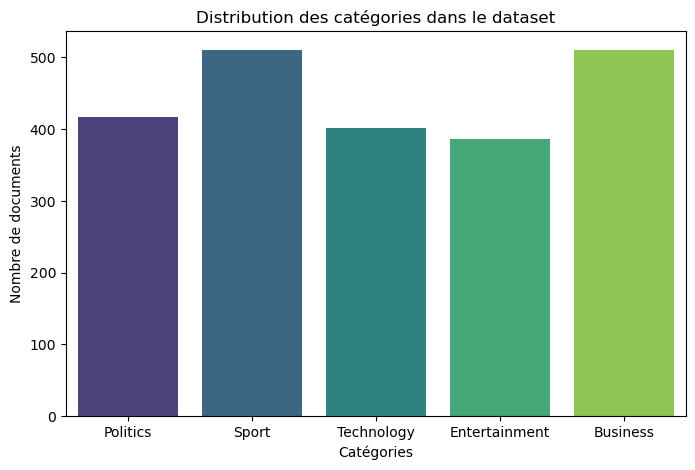

In [6]:
# Visualisation des catégories
plt.figure(figsize=(8, 5))
sns.countplot(x='Label', data=data, palette='viridis')
plt.title('Distribution des catégories dans le dataset')
plt.xlabel('Catégories')
plt.ylabel('Nombre de documents')
plt.xticks(ticks=[0, 1, 2, 3, 4], labels=['Politics', 'Sport', 'Technology', 'Entertainment', 'Business'])
plt.show()

# ***Préparation et nettoyage des données***

In [7]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [8]:
# Téléchargement des ressources nécessaires
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\manad\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\manad\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\manad\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\manad\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [9]:
# Initialisation
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [10]:
# Fonction de nettoyage
def clean_text(text):
    tokens = word_tokenize(text.lower())  # Tokenisation et mise en minuscule
    tokens = [word for word in tokens if word.isalnum()]  # Suppression des caractères spéciaux
    tokens = [word for word in tokens if word not in stop_words]  # Suppression des stopwords
    tokens = [lemmatizer.lemmatize(word) for word in tokens]  # Lemmatisation
    return tokens

In [11]:
# Application du nettoyage
data['tokens'] = data['Text'].apply(clean_text)


In [12]:
# Aperçu des données nettoyées
print("Exemple de texte nettoyé :")
print(data[['Text', 'tokens']].head())

Exemple de texte nettoyé :
                                                Text  \
0  Budget to set scene for election\n \n Gordon B...   
1  Army chiefs in regiments decision\n \n Militar...   
2  Howard denies split over ID cards\n \n Michael...   
3  Observers to monitor UK election\n \n Minister...   
4  Kilroy names election seat target\n \n Ex-chat...   

                                              tokens  
0  [budget, set, scene, election, gordon, brown, ...  
1  [army, chief, regiment, decision, military, ch...  
2  [howard, denies, split, id, card, michael, how...  
3  [observer, monitor, uk, election, minister, in...  
4  [kilroy, name, election, seat, target, show, h...  


# ***Construction de l'index inversé***

In [13]:
from collections import defaultdict

# Construction de l'index inversé
def build_inverted_index(data):
    inverted_index = defaultdict(list)
    for idx, tokens in enumerate(data['tokens']):
        for position, token in enumerate(tokens):
            inverted_index[token].append((idx, position))
    return inverted_index

# Création de l'index
inverted_index = build_inverted_index(data)


In [14]:
# Exemple d'index inversé
print("Exemple d'entrée dans l'index inversé :")
print(list(inverted_index.items())[:5])

Exemple d'entrée dans l'index inversé :
[('budget', [(0, 0), (0, 17), (0, 196), (6, 62), (15, 51), (15, 63), (15, 159), (15, 212), (15, 370), (15, 395), (22, 94), (22, 109), (25, 72), (25, 132), (25, 155), (29, 85), (30, 139), (37, 24), (42, 101), (55, 237), (61, 7), (61, 22), (61, 92), (61, 99), (75, 12), (75, 54), (88, 115), (95, 12), (95, 166), (95, 185), (118, 84), (118, 101), (118, 157), (118, 179), (119, 20), (119, 162), (127, 4), (127, 9), (127, 16), (127, 50), (127, 65), (127, 84), (127, 98), (127, 114), (137, 3), (137, 12), (137, 152), (151, 0), (151, 12), (151, 24), (151, 69), (151, 96), (154, 84), (180, 109), (193, 41), (193, 96), (193, 110), (193, 130), (193, 136), (222, 103), (223, 147), (228, 88), (228, 253), (239, 27), (246, 290), (246, 304), (250, 24), (255, 76), (263, 10), (263, 135), (263, 139), (269, 93), (269, 108), (285, 196), (304, 12), (304, 231), (304, 278), (312, 3), (312, 11), (312, 58), (312, 150), (312, 187), (315, 216), (326, 29), (336, 3), (336, 12), (336,

# ***Implémentation des algorithmes de recherche***

In [15]:
# Recherche d'un mot dans l'index
def search_word(word, inverted_index):
    if word in inverted_index:
        return inverted_index[word]
    else:
        return []

# Recherche d'une expression (mots consécutifs)
def search_expression(expression, inverted_index, data):
    tokens = expression.lower().split()  # Divise l'expression en mots
    results = []
    for doc_id, position in inverted_index.get(tokens[0], []):  # Cherche le premier mot
        if all((doc_id, position + i) in inverted_index.get(tokens[i], []) for i in range(len(tokens))):
            results.append((doc_id, position))  # Si tous les mots suivent dans le texte
    return results




In [16]:
# un exemple pour utiliser les fonctions définit en haut
word_results = search_word('business', inverted_index)
expression_results = search_expression('new technology', inverted_index, data)



In [17]:
print("\nRésultats pour le mot 'business' :")
print(word_results)




Résultats pour le mot 'business' :
[(5, 103), (5, 170), (24, 151), (36, 124), (45, 132), (64, 143), (85, 512), (87, 254), (90, 222), (133, 194), (137, 200), (148, 110), (154, 89), (156, 226), (163, 82), (166, 76), (177, 217), (179, 120), (179, 135), (180, 36), (224, 236), (246, 319), (246, 335), (255, 113), (260, 168), (275, 171), (299, 561), (301, 237), (315, 47), (315, 56), (336, 200), (357, 2), (372, 89), (373, 32), (373, 38), (373, 60), (373, 65), (373, 77), (373, 92), (373, 106), (373, 137), (373, 139), (373, 158), (373, 160), (374, 252), (392, 242), (399, 143), (412, 36), (412, 57), (412, 76), (412, 425), (412, 570), (412, 602), (412, 639), (412, 671), (412, 689), (412, 868), (412, 878), (412, 911), (412, 951), (412, 998), (412, 1031), (412, 1122), (412, 1163), (412, 1203), (412, 1211), (412, 1257), (412, 1295), (412, 1337), (412, 1363), (412, 1488), (412, 1588), (532, 66), (628, 433), (702, 224), (710, 146), (710, 147), (848, 433), (877, 224), (908, 151), (944, 138), (948, 263)

In [18]:
print("\nRésultats pour l'expression 'new technology' :")
print(expression_results)


Résultats pour l'expression 'new technology' :
[(373, 80), (941, 201), (954, 225), (962, 369), (965, 54), (965, 69), (1008, 25), (1025, 106), (1058, 156), (1101, 98), (1111, 131), (1135, 168), (1136, 113), (1155, 132), (1171, 98), (1179, 35), (1263, 54), (1263, 75), (1263, 85), (1326, 56), (1800, 125), (2066, 217), (2109, 245), (2137, 84)]


In [19]:
def calculate_mean_appearance(expression, inverted_index, data):
    tokens = expression.lower().split()
    doc_occurrences = defaultdict(list)  # Pour stocker les positions par document

    # Collecter les positions des tokens dans les documents
    for token in tokens:
        for doc_id, position in inverted_index.get(token, []):
            doc_occurrences[doc_id].append(position)

    # Calculer la moyenne d'apparition dans chaque document
    doc_means = {}
    for doc_id, positions in doc_occurrences.items():
        doc_means[doc_id] = len(positions) / len(tokens)  # Nombre d'occurrences divisé par le nombre de tokens

    return doc_means


In [20]:
def get_excerpts(text, positions, window_size=2):
    words = text.split()  # Divise le texte en mots
    excerpts = []
    for pos in positions:
        start = max(0, pos - window_size)  # Limite inférieure de la fenêtre
        end = min(len(words), pos + window_size + 1)  # Limite supérieure de la fenêtre
        excerpt = " ".join(words[start:end])  # Combine les mots dans la fenêtre
        excerpts.append(excerpt)
    return excerpts


In [21]:
# Exemple de document issu du dataset
text = data.iloc[0]['Text'] # c pour utiliser la première ligne du dataset
positions = [10, 20, 30]  # pour mettre les positions

# Appeler la fonction
excerpts = get_excerpts(text, positions, window_size=30)

# Afficher les extraits
print("Extraits générés :")
for i, excerpt in enumerate(excerpts, start=1):
    print(f"Extrait {i}: {excerpt}")


Extraits générés :
Extrait 1: Budget to set scene for election Gordon Brown will seek to put the economy at the centre of Labour's bid for a third term in power when he delivers his ninth Budget at 1230 GMT. He is expected to stress the
Extrait 2: Budget to set scene for election Gordon Brown will seek to put the economy at the centre of Labour's bid for a third term in power when he delivers his ninth Budget at 1230 GMT. He is expected to stress the importance of continued economic stability, with low unemployment and interest
Extrait 3: Budget to set scene for election Gordon Brown will seek to put the economy at the centre of Labour's bid for a third term in power when he delivers his ninth Budget at 1230 GMT. He is expected to stress the importance of continued economic stability, with low unemployment and interest rates. The chancellor is expected to freeze petrol duty and


In [22]:
# Obtenir les positions via la recherche d'expression
expression = "new technology"
results = search_expression(expression, inverted_index, data)

# Tester les extraits pour chaque résultat
for doc_id, position in results:
    text = data.iloc[doc_id]['Text']
    excerpts = get_excerpts(text, [position]) # Pass position as a list
    print(f"Document {doc_id + 1}:")
    for i, excerpt in enumerate(excerpts, start=1):
        print(f"  Extrait {i}: {excerpt}")

Document 374:
  Extrait 1: carried out independently by consultants
Document 942:
  Extrait 1: part in the pilot. "I
Document 955:
  Extrait 1: "seamless". "Gaming is becoming more
Document 963:
  Extrait 1: what their role would be
Document 966:
  Extrait 1: current DVD ripping (copying) programs
Document 966:
  Extrait 1: ripping and the resulting supply
Document 1009:
  Extrait 1: ultraviolet readers in the country's
Document 1026:
  Extrait 1: its 106 floors. The TFC
Document 1059:
  Extrait 1: IBM has said it will
Document 1102:
  Extrait 1: large digital music collections," said
Document 1112:
  Extrait 1: of computer chip and antenna
Document 1136:
  Extrait 1: of the key aspects of
Document 1137:
  Extrait 1: the design rules yet again".
Document 1156:
  Extrait 1: of computer chip and antenna
Document 1172:
  Extrait 1: large digital music collections," said
Document 1180:
  Extrait 1: five years' time. That is
Document 1264:
  Extrait 1: current DVD ripping (copying) programs

In [23]:
%pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [24]:
from wordcloud import WordCloud 
from io import BytesIO
import base64

def generate_wordcloud(expression, data, inverted_index):
    print(f"Expression reçue : {expression}")
    tokens = expression.lower().split()
    print(f"Tokens : {tokens}")

    context_words = []

    for doc_id, position in inverted_index.get(tokens[0], []):
        print(f"Doc ID : {doc_id}, Position : {position}")
        if all((doc_id, position + i) in inverted_index.get(tokens[i], []) for i in range(len(tokens))):
            token_list = data.iloc[doc_id]['tokens']
            context_words += token_list[max(0, position - 1):position + len(tokens) + 1]

    print(f"Context Words : {context_words}")
    if not context_words:
        return ""

    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(context_words))
    buffer = BytesIO()
    wordcloud.to_image().save(buffer, format='PNG')
    buffer.seek(0)
    encoded_image = base64.b64encode(buffer.read()).decode()
    return f"data:image/png;base64,{encoded_image}"




Expression reçue : business 
Tokens : ['business']
Doc ID : 5, Position : 103
Doc ID : 5, Position : 170
Doc ID : 24, Position : 151
Doc ID : 36, Position : 124
Doc ID : 45, Position : 132
Doc ID : 64, Position : 143
Doc ID : 85, Position : 512
Doc ID : 87, Position : 254
Doc ID : 90, Position : 222
Doc ID : 133, Position : 194
Doc ID : 137, Position : 200
Doc ID : 148, Position : 110
Doc ID : 154, Position : 89
Doc ID : 156, Position : 226
Doc ID : 163, Position : 82
Doc ID : 166, Position : 76
Doc ID : 177, Position : 217
Doc ID : 179, Position : 120
Doc ID : 179, Position : 135
Doc ID : 180, Position : 36
Doc ID : 224, Position : 236
Doc ID : 246, Position : 319
Doc ID : 246, Position : 335
Doc ID : 255, Position : 113
Doc ID : 260, Position : 168
Doc ID : 275, Position : 171
Doc ID : 299, Position : 561
Doc ID : 301, Position : 237
Doc ID : 315, Position : 47
Doc ID : 315, Position : 56
Doc ID : 336, Position : 200
Doc ID : 357, Position : 2
Doc ID : 372, Position : 89
Doc ID : 373

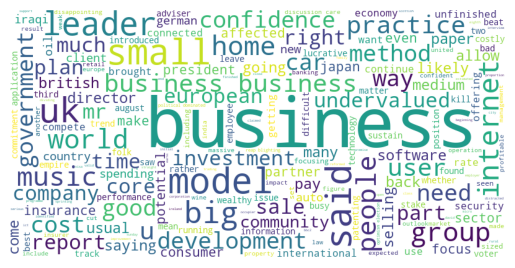

In [25]:
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO

# Un simple exemple pourbtester la fonction
encoded_image = generate_wordcloud("business ", data, inverted_index)

if encoded_image:
    # Décodage de l'image pour la visualiser avec matplotlib
    decoded_image = base64.b64decode(encoded_image.split(",")[1])
    image = Image.open(BytesIO(decoded_image))

    plt.imshow(image)
    plt.axis("off")
    plt.show()
else:
    print("Aucun nuage de mots généré.")


# ***Interface utilisateur avec Dash***

In [26]:
%pip install dash


Note: you may need to restart the kernel to use updated packages.


In [28]:
from wordcloud import WordCloud # type: ignore
from dash import Dash, Input, Output, State, dcc, html # type: ignore
from collections import defaultdict
import base64
from io import BytesIO

# Initialisation de l'application Dash
app = Dash(__name__)

# Mise en page
app.layout = html.Div([
    html.H1("Système de recherche textuelle"),
    dcc.Input(id='search-input', type='text', placeholder='Entrez un mot ou une expression', style={'width': '60%'}),
    html.Button('Rechercher', id='search-button'),
    html.Div(id='results-output', style={'margin-top': '20px'})
])

# Fonction pour générer un Word Cloud
def generate_wordcloud(context_words):
    if not context_words:
        return ""

    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(context_words))
    buffer = BytesIO()
    wordcloud.to_image().save(buffer, format='PNG')
    buffer.seek(0)
    encoded_image = base64.b64encode(buffer.read()).decode()
    return f"data:image/png;base64,{encoded_image}"

# Fonction pour extraire des extraits de texte
def extract_contexts(expression, data, inverted_index):
    tokens = expression.lower().split()
    contexts = []
    context_words = []
    doc_indices = defaultdict(list)

    for doc_id, position in inverted_index.get(tokens[0], []):
        if all((doc_id, position + i) in inverted_index.get(tokens[i], []) for i in range(len(tokens))):
            token_list = data.iloc[doc_id]['tokens']
            start = max(0, position - 5)  # 5 mots avant l'expression
            end = position + len(tokens) + 5  # 5 mots après l'expression
            contexts.append(' '.join(token_list[start:end]))
            context_words += token_list[start:position] + token_list[position + len(tokens):end]
            doc_indices[doc_id].append(position)

    return contexts, context_words, doc_indices

# Fonction pour calculer les statistiques
def calculate_statistics(expression, doc_indices):
    total_appearances = sum(len(positions) for positions in doc_indices.values())
    mean_appearances = {doc_id: sum(positions) / len(positions) for doc_id, positions in doc_indices.items()}
    distribution = {doc_id: positions for doc_id, positions in doc_indices.items()}

    return total_appearances, mean_appearances, distribution

# Callback pour traiter la recherche
@app.callback(
    Output('results-output', 'children'),
    Input('search-button', 'n_clicks'),
    State('search-input', 'value')
)
def update_results(n_clicks, search_query):
    if n_clicks is None or not search_query:
        return "Entrez un mot ou une expression pour commencer la recherche."

    # Extraction des extraits et mots de contexte
    contexts, context_words, doc_indices = extract_contexts(search_query, data, inverted_index) # type: ignore

    if contexts:
        # Génération du Word Cloud
        wordcloud_src = generate_wordcloud(context_words)

        # Calcul des statistiques
        total_appearances, mean_appearances, distribution = calculate_statistics(search_query, doc_indices)

        # Affichage des extraits, Word Cloud et statistiques
        return html.Div([
            html.H3("Extraits de texte contenant l'expression :"),
            html.Ul([html.Li(context) for context in contexts]),
            html.H3("Word Cloud des mots de contexte :"),
            html.Img(src=wordcloud_src, style={'width': '80%', 'margin-top': '20px'}),
            html.H3("Statistiques :"),
            html.P(f"Nombre total d'apparitions : {total_appearances}"),
            html.H4("Distribution des indices dans les documents :"),
            html.Ul([html.Li(f"Document {doc_id} : {positions}") for doc_id, positions in distribution.items()]),
            html.H4("Moyenne d'apparition dans chaque document :"),
            html.Ul([html.Li(f"Document {doc_id} : {mean:.2f}") for doc_id, mean in mean_appearances.items()])
        ])
    else:
        return "Aucun résultat trouvé."

# Lancer l'application
if __name__ == '__main__':
    app.run_server(debug=True)


OSError: Address 'http://127.0.0.1:8050' already in use.
    Try passing a different port to run_server.